# *ecophylo*: Simulating and assessing eco-evolutionary dynamics under past environmental changes in Python

# Abstract

We introduce the Python package ecophylo dedicated to coalescent-based simulation of eco-evolutionary dynamics. Species assemblages and their shared ancestry can be simulated by jointly taking into account the influence of past demographic fluctuations and extinctions along with how divergent genotypes have introduced new species over time through speciation.

The shared co-ancestry of present individuals is simulated backward in time using coalescent theory. Speciation events are then sprinkled over the simulated genealogy conditionally to its topology and branch lengths. The phylogenetic relationships amongst individuals and their abundances are finally obtained by merging paraphyletic clades into single species. Coalescent reconstruction of the genealogy of individuals can be simulated to represent past demographic fluctuations due to varying habitat availability, or include multiple communities linked by migration events.

The package includes tools to simulate large numbers of datasets and associated summary statistics, so that Approximate Bayesian Computation methods can be used to estimate parameter values for these processes. Diverse patterns of taxonomic and phylogenetic compositions can be generated. The first version of the package allows simulating neutral coalescent genealogies, and will incorporate further non-neutral eco-evolutionary scenarios in future. The package can be used to explore how past demographic fluctuations have affected species abundances and phylogenetic relationships, and to estimate the parameters of these processes based on observed patterns. We provide step by step examples in both Python and R languages.

Key-words: eco-evolutionary modelling; community phylogeny; coalescent; demographic stochasticity, ecological drift, extinction-speciation dynamics


# Introduction
Observed species distributions and biodiversity patterns are shaped by current ecological processes but also reflect the influence of past evolutionary and biogeographic dynamics (Svenning 2015). For instance, alternating periods of contraction and expansion of suitable environmental conditions should affect both demographic (Avise 2009) and diversification dynamics over time (Barthelemy et al. 2021, Lewitus and Morlon 2018). Hence, a fundamental goal of biogeography is to understand how changes in suitable environmental conditions due to past climatic and geomorphologic history have shaped biodiversity patterns observed at present (Bennett 1990 ). Historical biogeography typically investigates how species appear, go extinct and migrate, without considering the role of demography and community assembly dynamics over time (e.g., Yu, Harris & He, 2010). Conversely, population genetics and phylogeography emphasize the joint role of migration, mutation and drift in driving patterns of population genetic diversity in space and time (Avise, 2009). Comparative phylogeographic approaches aim to grasp congruent or differing influence of past historical events led by environmental fluctuations on several co-occurring taxa (Arbogast and Kenagy 2001, Swenson 2019, Overcast et al. 2019, 2020). Concurrently, the neutral theory of biogeography has underlined the role of migration, speciation and drift in shaping patterns of taxonomic diversity in space and time (Hubbell, 2001). Integrative modeling approaches are still needed to bridge the gap between phylogeography and biogeography, in order to better understand biodiversity dynamics at multiple spatial and temporal scales and their imprint in extant biodiversity patterns (Lexer et al 2013).

Furthermore, most approaches investigating how intertwined ecological and evolutive forces shape the relative abundances of species have assumed an equilibrium state of biodiversity with present habitat availability and configuration. However, the current state of biodiversity can retain the influence of past environmental conditions (Svenning and Skov 2005 , Ordonez and Svenning 2016 ). The neutral theory of biodiversity (Hubbell 2001) assumes constancy of metacommunity size Jm to predict the composition of regional biota under a speciation-drift equilibrium, estimated model applied in various biomes across the globe (Jabot and Chave 2008, Etienne et al. 2006). However, past environmental variations (especially climate) should have made habitat properties and species numbers in regional biota to fluctuate over time, i.e., Jm is not constant for a given biome. In the case where these fluctuations occur rapidly compared to the expected time-to-equilibrium of speciation, migration and drift dynamics (for instance with long-lived organisms with slow population dynamics), we expect that current biodiversity patterns should retain the signature of past environmental fluctuations. Thus by allowing $J_m$ to vary at specific ages of the past we can relax this consistency assumption and account for the discordance of demographic histories between distinct regional species pools. Such variation has been considered in phylogeographic models of genetic diversity with changing population size, but seldom in multispecies biogeographic models of biodiversity dynamics (Barthelemy et al. 2021).

Over long time scales, major geological  events have affected diversification rates, ie. the outcome of extinction and speciation, leading to increased phylogenetic diversity  (Alroy 2008). The separation of the geographical range of multi-species assemblages through the development of physical barriers can lead to allopatric speciation - a process well known to biogeographers as vicariance. Also, the ability of species to cross biogeographic borders and migrate to a given region can increase the phylogenetic diversity of the regional pool (Pennington 2004).  Dispersal and vicariance are thus often considered as competing hypothesis used to explain the spatial distrubutions of extant taxa. Hence, past environmental fluctuations and biogeographic events of vicariance and/or migration have jointly influenced the evolutionary trajectory of multi-species assemblages. Here we propose a novel simulation-based approach in which we consider how assembly dynamics in temporally changing environments (ecological perspective) affect speciation and extinction dynamics over a long-term (evolutionary perspective), depending on environmental changes over time.

Here, we introduce a new Python library dedicated to the simulation of multispecies eco-evolutionary dynamics. We expose the logic and advantages of the approach to examine how past multi-species non-equilibrium dynamics have shaped patterns of taxonomic and phylogenetic diversity. We show how the library can be used to design in silico experiments (Zurell 2010) to address the possible outcome of (meta)community models. Simulating ecological communities and the phylogenetic diversity within and between assemblages according to different scenarios can help establish a benchmark against which to infer the signatures of community-wide past biogeographic processes from the resulting patterns of taxonomic and phylogenetic diversity. The package includes options to simulate large numbers of datasets over broad ranges of parameters and scenarios of past demographic events and fluctuations. These methods are destined to be used alongside ABC methods, so as to estimate parameters of past demographic fluctuation from the observation of actual patterns of diversity (Csillery et al 2015).


# Core simulation algorithm in ecophylo.simulate 
## Coalescent-based simulation of assemblage genealogies

The core model rests on the fundamental hypothesis that stochastic population dynamics rule the patterns of relative species abundances in a given habitat over time, depending on the regional habitat extant henceforth denoted $J_m$ (Hubbell, 2001). Following the Hudson coalescent model (Hudson 1983), we assume that all individuals shrunk to their haplotypes in a multi-species assemblage can reproduce freely (panmixia assumption), with equal fitness (neutral assumption). The dynamics of the assemblage can be traced through the structure of their genealogy, i.e. by tracing the shared co-ancestry of extant individuals backwards in time until a single common ancestor is found (Kingman 1982). Coalescence is an event such as two lineages at generation $t$ share the same ancestor at generation $t-1$, which defines a bifurcating node in the genealogy of individuals. Generations in the model are discrete and non-overlapping, and a single coalescence event can happen at a given generation. When the number of sampled individuals at present is such as $n<<J_m(t)$, the distribution of coalescence times can be approximated as an exponential law with parameter $\lambda$ proportional to $1/(2·J_m (t))$ {Wakeley, 2009}. Therefore, the distribution depends on the fluctuation of $Jm(t)$ over time, thereby on the history of regional habitat extant. The variation of $J_m(t)$ is likely to depend on predefined, paleoenvironmentally distinct periods (Ref).

In addition, the genealogy depends on spatial structuring and migration dynamics across local assemblages. The coalescent simulator (Kelleher, 2020) used in ecophylo supports a discrete-deme model in which assemblages exchange migrants at given rates supplied in a migration matrix. In a coalescent approach, individuals moving from deme j to k backwards in time actually correspond to individuals migrating from deme $k$ to $j$ forwards in time. Thus the migration rates in the migration matrix represent as the proportion of immigrants received by a given deme at each generation. The migration matrix can be parameterized to encompass a wide range of migration scenarios, and can also depend on $t$ so as to represent changing migration dynamics during biogeographic history. By combining past fluctuations of $J_m$ and migration scenarios across demes, the coalescent-based modelling approach can account for a variety of dispersal and vicariance events hypothesized to have shaped the biogeographic histories of extant ecosystems (Ref gen). The topology of the resulting genealogy then reflects the combined influence of migration and ecological drift in a finite fluctuating environment with possible differing population demographic histories linked by migration.


## Phylogenetic reconstruction and species abundances
First, we started by simulating the genealogies of individuals in an assemblage experiencing past demographic fluctuations and/or linked by vicariance or migration events using the ms coalescent simulator (Hudson 2002; Kelleher, 2020), without allotting a species label to each individual. Second, we sprinkle mutation events over the branches of simulated genealogies depending on branch lengths, so that the number of mutations over a branch followed a Poisson distribution with parameter $\mu·B$ where $\mu$ is the point mutation rate and $B$ is the length of the branch. The descendants stemming from a branch with at least one mutation defined a genetically distinct clade. Since an extant species should be a monophyletic genetic clade distinct from other species, all paraphyletic clades of haplotypes at present were merged to form a single species. In the UNTB (Hubbell 2001) point mutations instantenously give rise to a new species, in which case all branches descending from a mutation event are merged to form species. Yet, there is a general consensus that the mecanisms behind speciation are more complex and should at the very least spread out over more than a single generation. Thus considering speciation as a drawn out protracted process, whereby groups of genetically distinct individuals should only be recongised as new species after a given period of $\tau$ generations (Rosindell 2010) meets more realistic expectations regarding the speciation process. Therefore, monophyletic lineages with distinct genotypes and older than $\tau$ generations were considered a distinct species (Manceau et al. 2016). Both options (protracted vs instantenous) speciation models are implemented in the *ecophylo* library and can be used to derive the phylogenetic relationships among individuals as well as the number of individuals descending from a speciation event in the genealogy, which defined the species abundance in the sample at present.

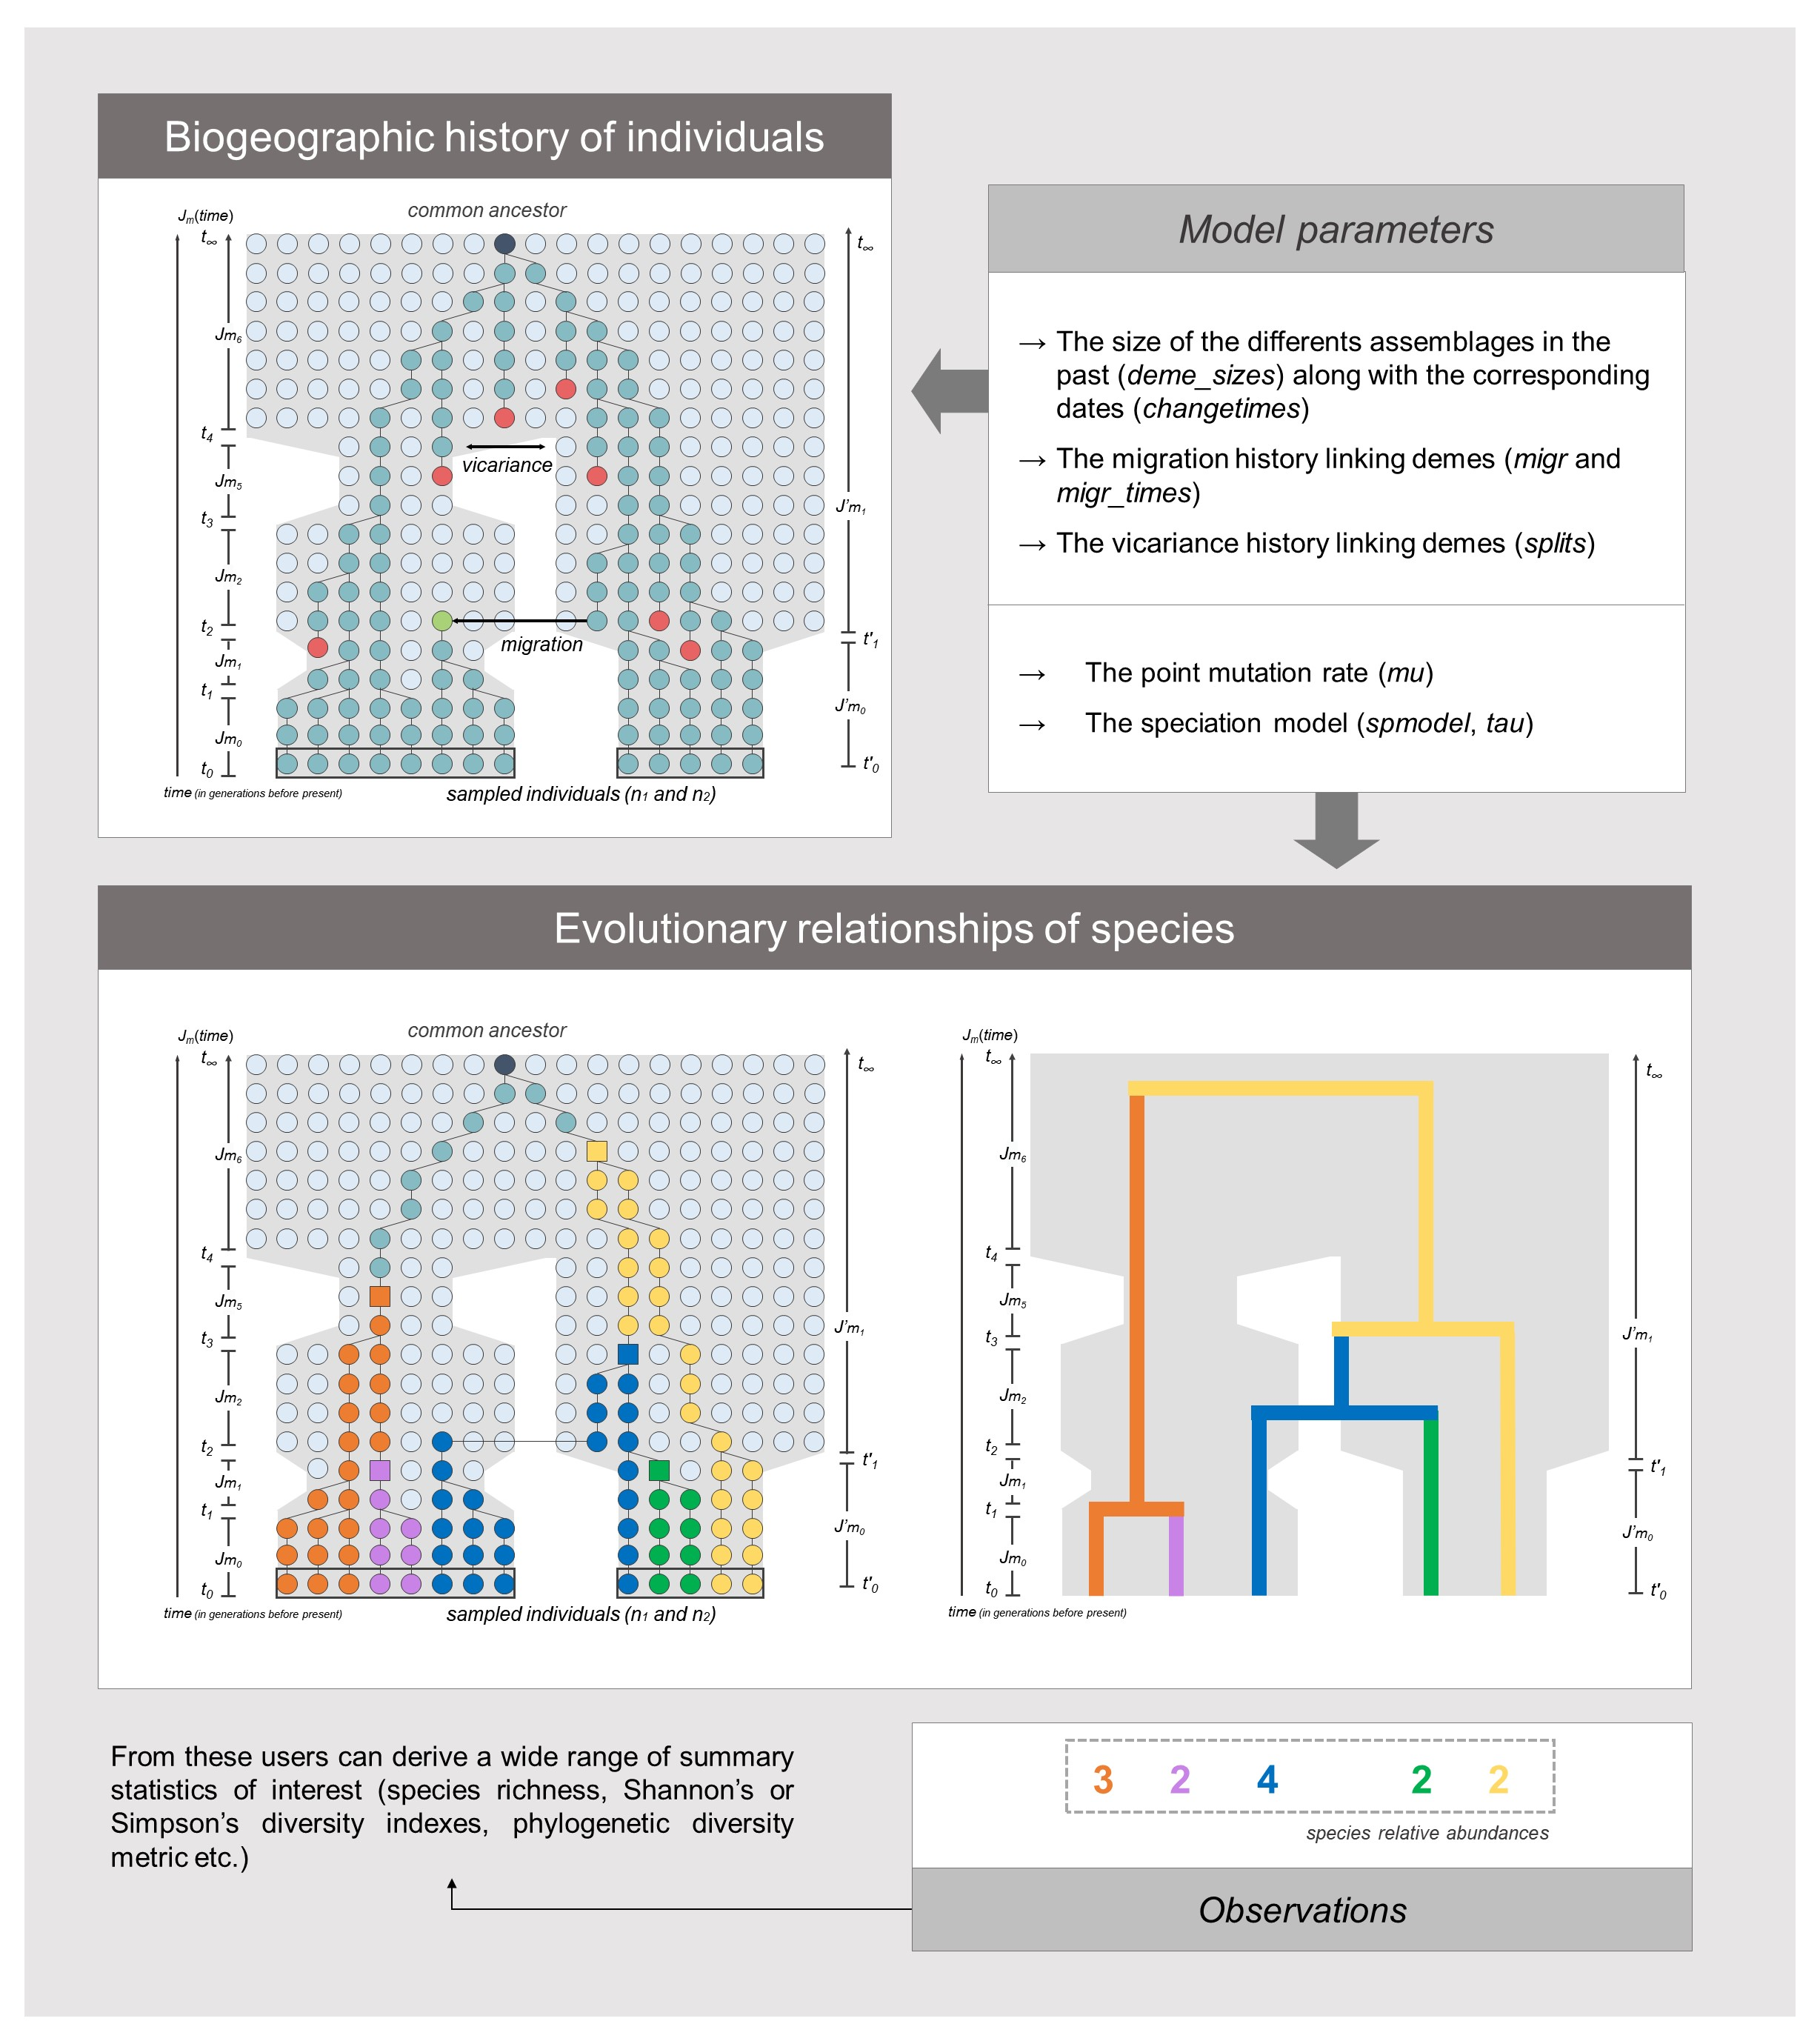

**Figure 1:** conceptual diagram illustrating the eco-evolutionary modelling approach of *ecophylo*. The population component reconstructs the effect of biogeographic history on the past co-ancestry in the genealogy of extant individuals (sampled individuals n1 and n2) until a common ancestor is found (black circle), using coalescent theory without assuming to which species they belong to. Although not explicitely represented in the coalescent process, ecological drift in a finite environement will lead to the exctinction of certain lineages (red circles). The topology of the resulting genealogy thus reflects how habitat availability as well as opportunities for crossing geographic borders whether by migration (green circle) or habiatat fragmentation (possibly leading to vicariance) have influenced the ecology of individuals.Then the phylogenetic relationships between extant species is determined by first sprinkling mutation events (squares) over the simulated genealogy conditionally its branch lengths and then merging paraphyletic clades into single species depending on the topology of the genealogy (represented here using different colors). 
Boxes represent a component of the model, or indicates the parameter(s) which determine the behavior of each component indicated with an arrow. 

# Application of the eco-evolutionary model
Here we show how to simulate communities and their phylogenetic relationships for a wide range of past demographic scenarios having affected species assemblages, using the ecophylo package in Python language. We also provide ways to produce many simulated datasets from prior distributions of model parameter values, so as to allow inferring parameter values of actual biodiversity patterns from the comparison of simulated to observed patterns with Approximate Bayesian Computation (ABC).

## Simulating past demographic fluctuations of multiple species

The ecophylo package essentially articulates itself around the ecophylo.simulate function. This function implements the above-mentioned simulation algorithm, which provide a phylogeny in Newick format along with corresponding species abundances, for a combination of parameter values representing the past biogeographic history of $J_m$. Each biogeographic event accounting for the history of $J_m$ occurs at a specific time that users must supply in changetime as a list in the order in which they occur. In the following example, an assemblage of species and their phylogenetic relationships are simulated assuming that $J_m$ has fluctuated in the past over 3 predefined periods, from present to 700 generations ago, from 700 to 10000 generations ago, and finally from 5000 generations until a common ancestor is found.

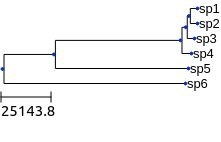

In [1]:
import ecophylo
n = 25 #the number of sampled individuals
deme_sizes = [[5000,10000,50000]] # the size of the assemblage in the past, the first element is the current assemblage size
mu = 0.001 # the point mutation rate
changetimes = [[0,700,10000]] # the dates (in generation time) at which the assemblage has changed sizes in the past


tree = ecophylo.simulate(samples = n,
                         deme_sizes= deme_sizes, 
                         mu = mu, 
                         changetimes= changetimes, seed= 42)

#tree.render("%%inline")
from IPython.display import display
display(tree.render("%%inline"))

The *getAbund* function allows us to retrieve the number of individuals descending from a speciation event in the genealogy, thus defining the species abundance in the sample at present.

In [2]:
abund = ecophylo.getAbund(tree)
print(abund)

[5, 3, 2, 6, 7, 2]


We can then compute summary statistics on the resulting phylogeny and species abundances. These summary statistics can then be used to compare different eco-evolutionary scenarios having yielded different patterns of extant community composition. 

In [3]:
import numpy as np

shannon = -sum([a/sum(abund)*np.log(a/sum(abund)) for a in abund if a != 0])
simpson = sum([a/sum(abund)**2 for a in abund if a != 0])
invsimpson = 1/simpson

print("Shannon-Weaver index = " + str(shannon))
print("Simpson's diversity index = " + str(simpson))
print("Inverse Simpson's = " + str(invsimpson)) 

Shannon-Weaver index = 1.6793741045013952
Simpson's diversity index = 0.04
Inverse Simpson's = 25.0


## Simulating multi-species assemblage structure and history 

The demographic history of $J_m$ can be further complexified by not only considering demographic fluctuations but also including multiple demes exchanging migrants. Multiple demes can be supplied to the *ecophylo.simulate* function, by specifying the number of sampled individuals in each deme in list format. In the following section we show how to simulate an assemblage of species and their phylogenetic relationships, whereby multiple demes can fluctuate in size over time and be linked by migration of varying intensity and/or originate from the split of an ancestral deme.

### Multiple demes linked by migration

The detailed history of $J_m$ in each deme should be supplied as a nested list in *deme_size*, along with the corresponding dates in *changetimes* (in generation time) at which the changes in size occur. In the following example, we consider two demes whose sizes have fluctuated in the past, and which are linked by a symmetric migration rate of 0,7. This means that at each generation 70% of individuals from each deme come from the other.


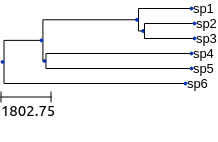

In [4]:
samples = [5, 10] # the number of sampled individuals in each deme
deme_sizes = [[1000,2500],[4000,5000,6000]] # the sizes of the demes in the past, again the first element should be the present deme size
changetimes = [[0,100], [0,300,400]] # the dates in the past (in generation time) at wich each demes has changed size

migr = 0.7 # the symmetric migration rate between demes

tree = ecophylo.simulate(samples = samples,
                         deme_sizes= deme_sizes, 
                         mu = mu, 
                         changetimes= changetimes,
                         migr = migr, seed= 42)

tree.render("%%inline") 

A more complex migration history can be provided, for instance by supplying a migration matrix detailing each pairwise migration rates between demes or a list of migration matrixes (or symmetric migration rates) in the case where these have varied in the past . In this case, the dates at which migration has changed should be provided to *ecophylo.simulate* using the *migr_time* parameter. In the following example, migration between demes is not symmetric, and has changed in the past. Thus, we provide a list of migration matrixes and a corresponding list of dates, indicating that the migration matrix has changed over time at specified periods.

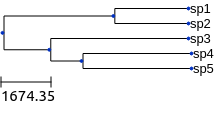

In [5]:
samples = [5, 10] # the number of sampled individuals in each deme
deme_sizes = [[1000,2500],[4000,5000,6000]] # the sizes of the demes in the past, again the first element should be the present deme size
changetimes = [[0,100], [0,300,400]] # the dates in the past (in generation time) at wich each demes has changed size

migr = [[[0,0.1],
        [0.2,0]]
        ,
        [[0,0.3],
        [0.4,0]]
        ,
        [[0,0.5],
        [0.6,0]]
        ,
        [[0,0.7],
        [0.6,0]]] # the migration matrixes between demes in the past, the first element is the current migration matrix

migr_times = [0, 100, 200, 300] # the dates in the past (in generation time) at which the migration rate has changed

tree = ecophylo.simulate(samples = samples,
                         deme_sizes= deme_sizes, 
                         mu = mu, 
                         changetimes= changetimes,
                         migr = migr,
                         migr_times = migr_times, seed= 42)

tree.render("%%inline") 

In situations with multiple demes, we can compute summary statistics of $\beta$ diversity. The *getDeme* function allows us to retrieve the deme of the individuals descending from a speciation event in the genealogy and thus species abundances relative to each deme. 

In [6]:
demes = ecophylo.getDeme(tree)
beta = sum([all([l>0 for l in list]) for list in demes]) / len(demes)
beta

0.6

### Simulating deme split history #TODO: re-document how to use splits

A description of the deme split history should be provided to *ecophylo.simulate* using the supplementary *vic_events* parameter to specify whether and how splits in demes may have led to subsequent vicariance. This object should be a nested list containing the details of each split event, containing in order: the date (in generations before present) at which the split occurred, the demes resulting from the split and finally the ancestral deme number . In this example, we consider a situation in which 2000 generations ago, 2000 individuals are seperated from an ancestral deme originally containing 6000 individuals to form extant deme 2. Later, 1000 generations ago, the ancestral deme, now containing 4000 individuals splits again to form extant demes 1 and 0. This can be seen, perhaps more easily, in a backward process as demes 0 and 1 merging 1000 generations ago followed by demes 2 and 1 merging 2000 generations ago. 

In [14]:
samples = [3,3,3]
deme_sizes = [[200], [200, 300, 400], [200]]
changetimes = [[0], [0, 1000, 2000], [0]]
splits = [[[0,1], 1, 1],
          [[1,2], 1, 2]]

tree = ecophylo.simulate(samples = samples,
                         deme_sizes= deme_sizes, 
                         mu = mu, 
                         changetimes= changetimes,
                         splits = splits, seed= 42)

Thus, as long as the split dates appear in the correct order in *change_time* for the corresponding ancestral deme and match the sizes of the ancestral deme in the past provided in *com_size*, vicariance events can be supplied to *ecophylo.simulate* along with previously mentioned fluctuations in deme sizes as well as varying migration history.

## Examining contrasting eco-evolutionary scenarios

Wether to conduct virtual experiments examining how different eco-evulionary scenarios have shaped patterns of diversity (Barthelemy et al. 2021) or to carry out inference (Csillery et al. 2010), *ecophylo* allows simulating large datasets over wide ranges of eco-evolutive parameters. Specifically, the *ecophylo.dosimul* function can be used to call *ecophylo.simulate* and retreive summary statistics generated for different parameter values drawn from specified distributions. The parameter format is very similar to that of the *ecophylo.simulate* function. The *nsim* parameter is used to specify the number of simulations to run. Then, whether a given parameter for the simulation should be drawn from a prior distribution should be specified by remplacing the parameter value by a list containing in order: the parameter bounds as well as a string specifying the shape of the distribution. The *dosimul* function then returns a table of sampled parameter values used for the simulations, a table of summary statistics and (if specified) exports the simulated phylogeneties.

Let us reconsider our first example in which $J_m$ has fluctuated in the past over 3 predefined periods. Let us say, for the sake of this example, that we wish to simulate what happens when the size of the assemblage between 700 and 10000 generations takes different values. In this case, the corresponding element in *comsize* should be replaced by a list specifying the bounds (in this example, 5000 and 50000) as well as the desired distribution in which this parameter should be drawn (in this example, a uniform distribution). 

In [15]:
n = 20 #the number of sampled individuals
deme_sizes = [[5000,[5000,50000, "uniform"],50000]] # the size of the assemblage in the past, the first element is the current assemblage size
mu = 0.001 # the point mutation rate
changetimes = [[0,700,10000]] # the dates (in generation time) at which the assemblage has changed sizes in the past

nsim = 5 # number of simulations to run


output = ecophylo.dosimuls(nsim = nsim,
                         samples = n,
                         deme_sizes= deme_sizes, 
                         mu = mu, 
                         changetimes= changetimes)
                    

We can then access a table of parameters used for each simulation, in this case with the size of the assemblage over the second time period noted *"deme_sizes_pop0_t1"* varying uniformily between 5e3 an 5e5. 

In [16]:
output[0] # parameters used for the simulations

,samples_pop0,mu,tau,deme_sizes_pop0_t0,deme_sizes_pop0_t1,deme_sizes_pop0_t2,time_pop0_t1,time_pop0_t2
0,20,0.001,0,5000,28828,50000,700,10000
1,20,0.001,0,5000,47443,50000,700,10000
2,20,0.001,0,5000,10015,50000,700,10000
3,20,0.001,0,5000,35200,50000,700,10000
4,20,0.001,0,5000,6758,50000,700,10000


We can also retrieve the associated relative species abundances (number of individuals per species) as well as the number of species per deme for each simulation.

In [17]:
output[1] # summary statistics (abundances and alpha diversity per deme)

,0,1,2,3,4,5,6,7,8,9,alpha0
0,1.0,1.0,3.0,6.0,2.0,3.0,4.0,0.0,0.0,0.0,7
1,1.0,1.0,1.0,5.0,2.0,1.0,2.0,5.0,2.0,0.0,9
2,1.0,6.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,4.0,10
4,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,8.0,0.0,9


The resulting tables can then easily be integrated in further analyses or used for inference, for instance using Approximate Bayesian Computation (ABC). For users wishing to use the dedicated tools in R language, a script is provided in the supplementary materials that will allow users to easily import the results of their simulations in R.

# Discussion

*ecophylo* bridges the gap between ecological models representing population and assembly dynamics, and evolutionary models representing the appearance, disappearance of taxa over time. Thanks to great flexibility in parametrization and simplicity in output format, we feel that this freely available Python library meet the need of scientists developing novel eco-evolutionary models to infer, hindcast and forecast biodiversity patterns.

Studies in ecology often neglect the influence of evolutionary events, by customarily considering the regional species pool from which communities assemble via rapid local dynamics as a static snapshot of evolutionary history (Lessard et al. TREE 2012). However, recent studies have called for a fuller integration of biogeographic history into community ecology (Swenson 2019, Overcast et al. 2019, 2020), as well as for a more mechanistic understanding and modeling of key processes shaping the composition of species pools (Denelle et al. 2019). With the novel simulation algorithm proposed in the ecophylo package, we explicitly represent how elementary ecological mechanisms such as ecological drift and migration (Vellend 2010) in a finite, temporally variable environment shape evolutionary trajectories and result in extant patterns of phylogenetic and taxonomic diversity. First, our model allows relaxing the assumption of constancy in metacommunity size of the neutral theory of biodiversity (Hubbell 2001), and thus accounts for the discordance of demographic histories between distinct regional species pools with fluctuating sizes over time. This feature is an essential advantage of ecophylo to understand and model the influence of past environmental changes on biogeographic dynamics and biodiversity patterns. Also, modeling speciation as a gradual process by providing a way to delimit extant taxa (Manceau et al. 2015) meets more realistic expectations than considering speciation as an instantaneous event (Rosindell et al. 2010).  Secondly, the simulation algorithm proposed in the ecophylo package by decoupling the dynamics of individuals in a fluctuating environment from the speciation process, allows extending the coalescent modeling framework (Kingman 1982, Hudson 1983) to consider multiple species assemblages (Manceau et al. 2015). Thus, ecophylo can be used in the context of phylogeography to investigate the remnant influence of past biogeographic events on several co-occurring taxa (Barthelemy et al. 2021). 

The *dosimul* function of the ecophylo package makes it possible to generate patterns of diversity along broad ranges of parameter values reflecting contrasted scenarios of past demographic fluctuations as well as migration and/or habitat fragmentation history having affected multi-species assemblages. An overarching goal in both ecology and evolution is to infer the mechanisms responsible for shaping diversity patterns from the limited information they contain at present (McGill 2019, Stouffer 2019). By adopting a mechanistic modeling approach of eco-evolutionary processes, we can first address whether a set of given metrics is sensitive to the mechanisms we chose to investigate by designing virtual experiments. For instance, we can compare large virtual datasets generated over a wide range of parameters, which represent a wide range of biogeographic scenarios we wish to investigate, and then determine which subset of metrics, if any, can keep track of these mechanisms of interest (Barthelemy et al. 2021). For instance, in the case were confounding extant distribution patterns can arise from either vicariance or migration or a combination of both processes, ecophylo can be used to examine patterns of phylogenetic and/or taxonomic diversity simulated over a broad spectrum of scenarios combining migration and vicariance events. It is then possible to assess whether the chosen set of diversity metrics allow distinguishing between the influence of migration versus vicariance (Hastie et al. 2009, Csillery et al. 2012). Second, we can use simulated datasets to carry out inference, that is, retracing the most likely past demographic history of Jm based on the comparison of these datasets to actual extant biodiversity patterns (Csillery et al. 2010). While most existing approaches estimate Jm as the harmonic mean of the per-generation Jm  (Etienne 2005), explicitly modeling the temporal variation of Jm should allow investigating the relationship with past environment history. Furthermore, the speciation model itself can add considerable complexity to the demographic model depending on the constraints it imposes on the speciation process, for instance with protraction or the strict respect of monophyly. In these situations, theta  has no tractable analytical solutions for a given set of demographic parameters, as it has been largely shown in population genetics. However, with Approximate Bayesian Computation (ABC) methods we can avoid computing the explicit likelihood of the model by approximating it through the relative proximity between the true dataset and datasets simulated given a coalescent model (Csillery 2012, Beaumont 2010, Jabot and Chave 2008).

The baseline eco-evolutionary model provided in ecophylo assumes neutrality. That is, species are evenly subject to fluctuations in the size of the assemblage they form with no regards to how individual fitness differences may influence their probability to persist in a given environment or migrate. Increasing the complexity of the model would require accounting for the ways in which deterministic processes such as ecological biotic and abiotic filtering, jointly with evolutionary natural selection, can affect diversification and assemblage dynamics over time (Ewing and Hermisson 2010, Ovaskainen et al. 2011, Karhunen et al. 2013, Manceau et al. 2016). Yet, because of the implications simulating all these elementary mechanisms for all individuals forward in time would have on computation times, we have focused on a coalescent framework (Munoz et al. 2018). Later versions of the ecophylo package should gain in complexity by drawing from recent developments in coalescent simulation algorithms implementing spatially explicit methods (Kelleher et al. 2014 ; Rosindell et al. 2008), natural selection (Shlyakhter et al. 2014) or individual/species interactions (Lepers et al. 2021 ). Yet, for the time being, ecophylo in its initial version, with the flexibility in parameterization of simulations along with in the choice of summary statistics for ABC analyses, can be used as a neutral baseline to investigate how elementary mechanisms of mutation, drift and migration in a finite fluctuating environment influence evolutionary trajectories and thus shape patterns of diversity.


# Data accessibility
The ecophylo package is available on https://github.com/thegreatlizzyator/ecophylo
The ecophylo package can be installed by applying the following command:

In [ ]:
#pip install ecophylo

# Authors’ contributions statement
EB conceived the study and built the basic architecture of the ecophylo package. EB and MJ did substantial work on adding functionalities, testing and cleaning code. All the authors contributed to setting up the framework and to write the manuscript.

# References